# Expanding ice Ih and calculating the radial distribution

In [49]:
import numpy as np
from prody import *
from matplotlib import pyplot as plt
import sys
import time

sys.path.insert(0, '../src/')
from parameters import *
import radial_distribution
reload(radial_distribution)
from radial_distribution import *
#from pdb_handling import *

import pdb_handling
reload(pdb_handling)
from pdb_handling import *

### Parameters

In [39]:
# g(r) parameters
max_r = 26 #Angst
bin_width = .1 #0.05
nbins = int(max_r/bin_width) #20000

# random displacement parameters
n_random = 1
dr = 0.2

# ice parameters
file_name, density, dx, dy, dz = iceIh_parameters()
n_expand=5

In [3]:
save_path = '/Users/fivos/Documents/Projects/12 WAXS APS amorphous ices/03_comparison_to_crystalline/05_analysed/'
data_path = '/Users/fivos/Documents/Projects/12 WAXS APS amorphous ices/03_comparison_to_crystalline/01_data/'
data_file = '%s%s.pdb'%(data_path,file_name)
print data_file

/Users/fivos/Documents/Projects/12 WAXS APS amorphous ices/03_comparison_to_crystalline/01_data/ice1h.pdb


### Load data

In [4]:
wtr1 = parsePDB(data_file)

@> WARNING failed to parse occupancy at line 0
@> WARNING failed to parse beta-factor at line 0
@> WARNING failed to parse occupancy at line 1
@> WARNING failed to parse beta-factor at line 1
@> WARNING failed to parse occupancy at line 2
@> WARNING failed to parse beta-factor at line 2
@> WARNING failed to parse occupancy at line 3
@> WARNING failed to parse beta-factor at line 3
@> WARNING failed to parse occupancy at line 4
@> WARNING failed to parse beta-factor at line 4
@> WARNING failed to parse occupancy at line 5
@> WARNING failed to parse beta-factor at line 5
@> WARNING failed to parse occupancy at line 6
@> WARNING failed to parse beta-factor at line 6
@> WARNING failed to parse occupancy at line 7
@> WARNING failed to parse beta-factor at line 7
@> WARNING failed to parse occupancy at line 8
@> WARNING failed to parse beta-factor at line 8
@> WARNING failed to parse occupancy at line 9
@> WARNING failed to parse beta-factor at line 9
@> WARNING failed to parse occupancy at 

In [10]:
oxgs1 = wtr1.select('name O1')
oxgs2 = wtr1.select('name O2')
oxgs3 = wtr1.select('name O3')
oxgs4 = wtr1.select('name O4')
oxgs5 = wtr1.select('name O5')
oxgs6 = wtr1.select('name O6')
oxgs =  oxgs1.copy()+oxgs2.copy()+oxgs3.copy()+oxgs4.copy()+oxgs5.copy()+oxgs6.copy()
xyz = oxgs.getCoords()

### Expand ice

4.61323552401


In [40]:
oxgs_expanded = expand_ice(oxgs,n=n_expand,dx=dx,dy=dy,dz=dz)
#oxgs_expanded = shift_structure(oxgs,dx=dOOx,dy=dOOy,dz=dOOz)+oxgs.copy()
xyz_expanded  = oxgs_expanded.getCoords()

Crystal expanded: 117A x 110A x 135A 


### Remove doubles

In [41]:
xyz_unique = np.unique(xyz_expanded,axis=0)

In [42]:
print xyz.shape
print xyz_expanded.shape
print xyz_unique.shape

(432, 3)
(54432, 3)
(54000, 3)


Save expanded

In [260]:
#oxgs_unique = oxgs_expanded.select('x==%f y==%f z==%f'%(xyz[i,0],xyz[i,1],xyz[i,2]))
#outfile = '%s%s_exp.pdb'%(data_path,file_name)
#writePDB(outfile,oxgs_expanded)

### Calculate g(r)

In [52]:
gr0 = calculate_gr(xyz,nbins=nbins,bin_width=bin_width,density=density,radius = max_r)
r = np.arange(0,nbins*bin_width,bin_width)

### Introduce disorder 

In [53]:
r = np.arange(0,nbins*bin_width,bin_width) 
gr = np.zeros(nbins)
n_oxygens = xyz_unique.shape[0]

rnd = np.random.random_sample((n_oxygens,3))
t0 = time.time()
for i in range(n_random):
    rnd = np.random.random_sample((n_oxygens,3))
    dxyz = (rnd*2-1)*dr
    gr += calculate_gr(xyz_unique+dxyz,nbins=nbins,bin_width=bin_width,density=density,radius = max_r)
gr/=float(n_random)
print time.time()-t0

373.783832073


### plot results

[ 0.05429069]


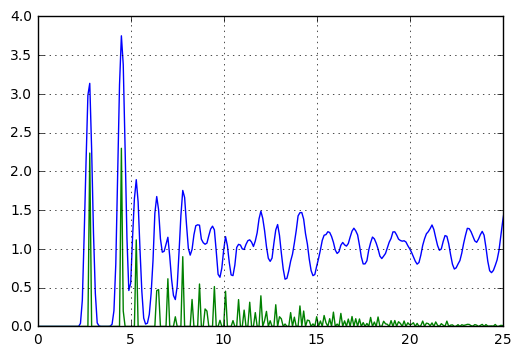

In [59]:
plt.plot(r,gr*25)
plt.plot(r,gr0*dr)
plt.xlim(0,25)
#plt.ylim(0,3)
plt.grid()

print gr[r==25]
plt.show()

In [146]:
#np.save('%sgr_expanded_disorder'%save_path,np.array([r,gr]))

### Load amorhous ice data

In [200]:
files = ['eHDAr256-356_slow_heat_rate_temp_Sq_q.npy',
         'eHDAr256-356_slow_heat_rate_temp_gr_r.npy']
path = '/Users/fivos/Documents/Projects/12 WAXS APS amorphous ices/02_analysis/05 SCRIPTS/03_Daniel_P/data/'
#temperature,Sq,q = np.load(path+files[0])
temperature,gr2,r2 = np.load(path+files[1])
temperature += 10

gr2[:,:122]=0
print gr2.shape

(21, 1225)


In [201]:
r3,gr3= np.load(save_path+'gr_ice12_d=66_dr=0.2.npy')

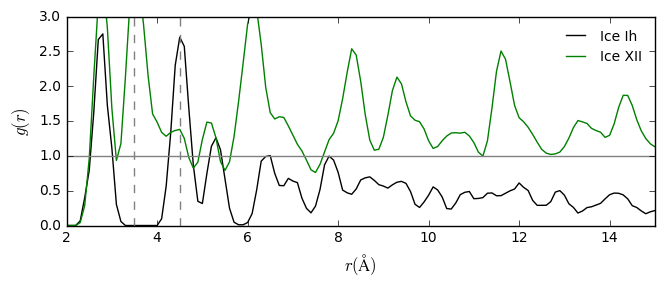

In [202]:
fig = plt.figure(figsize=[7,3])
#plt.plot(r2,gr2[12]+2,'b-',label='HDA',alpha=1,lw=1,c='red',ls='-')
#plt.plot(r2,gr2[19]+2,'g-',label='LDA',alpha=1,lw=1,c='blue',ls='-')
plt.plot(r,gr,c='black',label = 'Ice Ih',ls='-')
plt.plot(r3,gr3,c='green',label = 'Ice XII',ls='-')
plt.ylabel(r'$g(r)$',size=12)
plt.xlabel(r'$r (\rm \AA)$',size=12)
plt.axvline(x=3.5,c='gray',ls='--')
plt.axvline(x=4.5,c='gray',ls='--')
plt.axhline(y=1,c='gray')
plt.tight_layout()

plt.xlim([2,15])
plt.ylim([0.,3.])
plt.legend(frameon=False,loc='upper right', prop={'size': 10})
plt.savefig('/Users/fivos/Desktop/Fig3.png',dpi=300)
plt.show()

In [140]:
r,gr = np.load('%sgr_expanded_disorder.npy'%save_path)

In [141]:
print save_path

/Users/fivos/Documents/Projects/12 WAXS APS amorphous ices/03_comparison_to_crystalline/01_data/
